In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from datetime import date

In [2]:
trans = pd.read_csv("Transactions.csv")

In [3]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

3494 customers

101 products

In [5]:
trans.shape

(20000, 13)

In [6]:
trans["customer_id"].nunique()

3494

Notably, there are 3494 customers who have bought 20,000 products

In [7]:
trans["product_id"].nunique()

101

Distinctfully there are 101 products that have been bought 20,000 times

In [8]:
trans["transaction_id"].nunique()

20000

In [9]:
trans['online_order'].unique()

array([0., 1.])

In [10]:
trans['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [11]:
trans['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [12]:
trans['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', 'missing'], dtype=object)

In [13]:
trans["product_line"].unique()

array(['Standard', 'Road', 'Mountain', 'Touring', 'missing'], dtype=object)

In [14]:
trans["product_class"].unique()

array(['medium', 'low', 'high', 'missing'], dtype=object)

In [15]:
trans["product_size"].unique()

array(['medium', 'large', 'small', 'missing'], dtype=object)

In [16]:
brand = trans.groupby([ 'brand',
       'product_class'])['transaction_id'].count().reset_index()
brand.head()

,brand,product_class,transaction_id
0,Giant Bicycles,high,785
1,Giant Bicycles,low,196
2,Giant Bicycles,medium,2331
3,Norco Bicycles,high,566
4,Norco Bicycles,low,632


In [17]:
brand.shape

(18, 3)

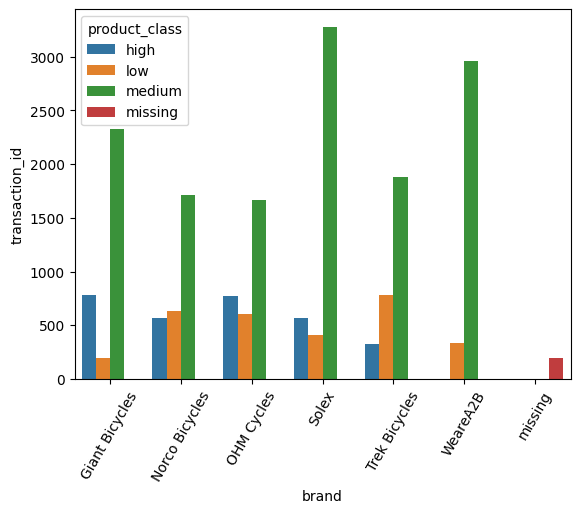

In [18]:
sns.barplot(data=brand, x="brand", y='transaction_id', hue="product_class")
plt.xticks(rotation=60)
plt.show()

WeareA2B, Solex & Giant Bicyles are best selling brands,
Medium class is the most popular product_class to the customers

In [19]:
trans['transaction_date'].max()

'2017-12-30'

In [20]:
trans['transaction_date'].min()

'2017-01-01'

<AxesSubplot:xlabel='online_order', ylabel='count'>

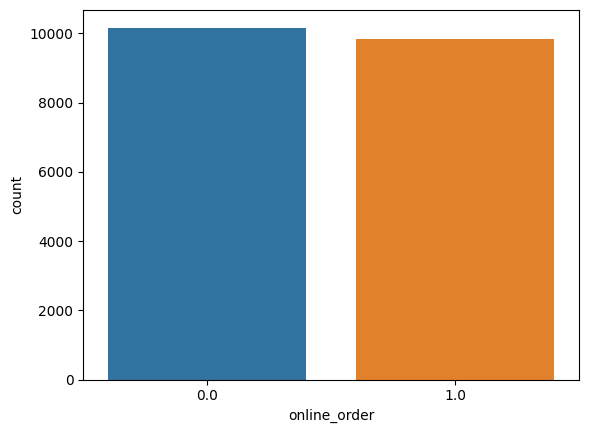

In [21]:
sns.countplot(data=trans, x='online_order')

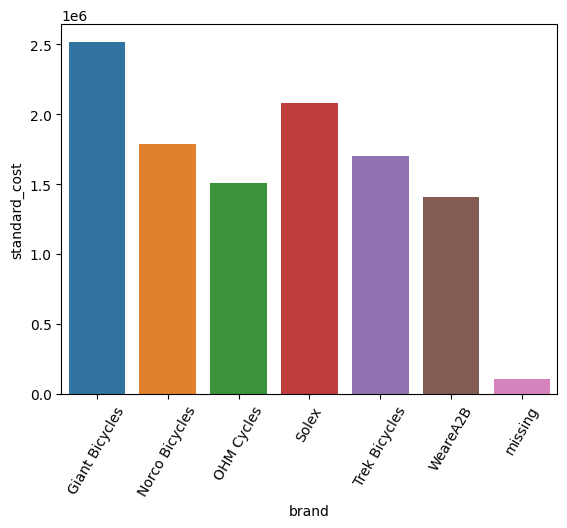

In [22]:
revenue = trans.groupby(["brand"])['standard_cost'].sum().reset_index()
sns.barplot(x=revenue.brand, y=revenue.standard_cost)
plt.xticks(rotation=60)
plt.show()

Giant bicycles and solex has the most revenue

In [23]:
approvals = trans.groupby(['order_status', 'brand'])['transaction_id'].count().reset_index()
cancelled = approvals[approvals["order_status"] == "Cancelled" ]
cancelled

,order_status,brand,transaction_id
7,Cancelled,Giant Bicycles,29
8,Cancelled,Norco Bicycles,25
9,Cancelled,OHM Cycles,27
10,Cancelled,Solex,42
11,Cancelled,Trek Bicycles,25
12,Cancelled,WeareA2B,30
13,Cancelled,missing,1


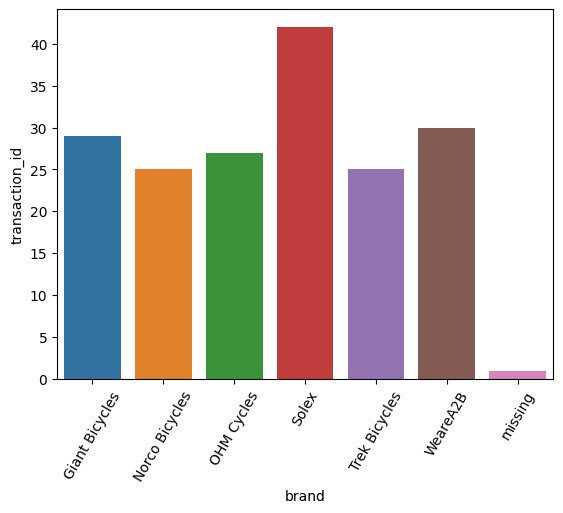

In [24]:
sns.barplot(data=cancelled, y = "transaction_id", x = "brand" )
plt.xticks(rotation=60)
plt.show()

In [72]:
trans.transaction_date.max()

'2017-12-30'

In [73]:
trans.transaction_date.min()

'2017-01-01'

In [74]:
trans['month'] = pd.DatetimeIndex(trans['transaction_date']).month

In [75]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,10


In [97]:
grouped_months = trans.groupby("month")["list_price"].sum().reset_index()
px.bar(grouped_months, x="month", y="list_price",  color="list_price",
     title="Totals sales in every month")

October had the highest sales

September had the lowest sales

There is no much variation in sales between the months

Giant Bicycles,  Solex and WeareA2B have most cancels though has the most sales.

In [25]:
custdem = pd.read_csv("CustomerDemographic.csv").drop('Unnamed: 0', axis=1)

In [26]:
custdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,missing,Male,33,1961-10-03,missing,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,missing,Affluent Customer,N,Yes,8.0


In [27]:
custdem.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [28]:
custdem.shape

(3912, 12)

In [29]:
custdem["customer_id"].nunique()

3912

In [30]:
custdem["gender"].unique()

array(['F', 'Male', 'Female', 'Femal', 'M'], dtype=object)

In [31]:
# replace "F","Femal", "M", "U"
custdem["gender"] = custdem["gender"].replace(to_replace=['F','Femal','U','M'], value=["Female","Female",'Male','Male' ])


In [32]:
custdem["gender"].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

In [33]:
custdem["job_title"].nunique()

196

In [34]:
custdem["job_industry_category"].unique()

array(['Health', 'Financial Services', 'Property', 'IT', 'missing',
       'Retail', 'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [35]:
custdem["wealth_segment"].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [103]:
custdem["deceased_indicator"].value_counts()

N    3909
Y       2
Name: deceased_indicator, dtype: int64

In [104]:
custdem["owns_car"].value_counts()

Yes    1973
No     1938
Name: owns_car, dtype: int64

In [38]:
collection = custdem.groupby(['gender','wealth_segment','deceased_indicator',
                             'owns_car'])["customer_id"].count().reset_index()
collection

,gender,wealth_segment,deceased_indicator,owns_car,customer_id
0,Female,Affluent Customer,N,No,232
1,Female,Affluent Customer,N,Yes,248
2,Female,Affluent Customer,Y,Yes,1
3,Female,High Net Worth,N,No,250
4,Female,High Net Worth,N,Yes,264
5,Female,Mass Customer,N,No,530
6,Female,Mass Customer,N,Yes,514
7,Male,Affluent Customer,N,No,229
8,Male,Affluent Customer,N,Yes,252
9,Male,High Net Worth,N,No,236


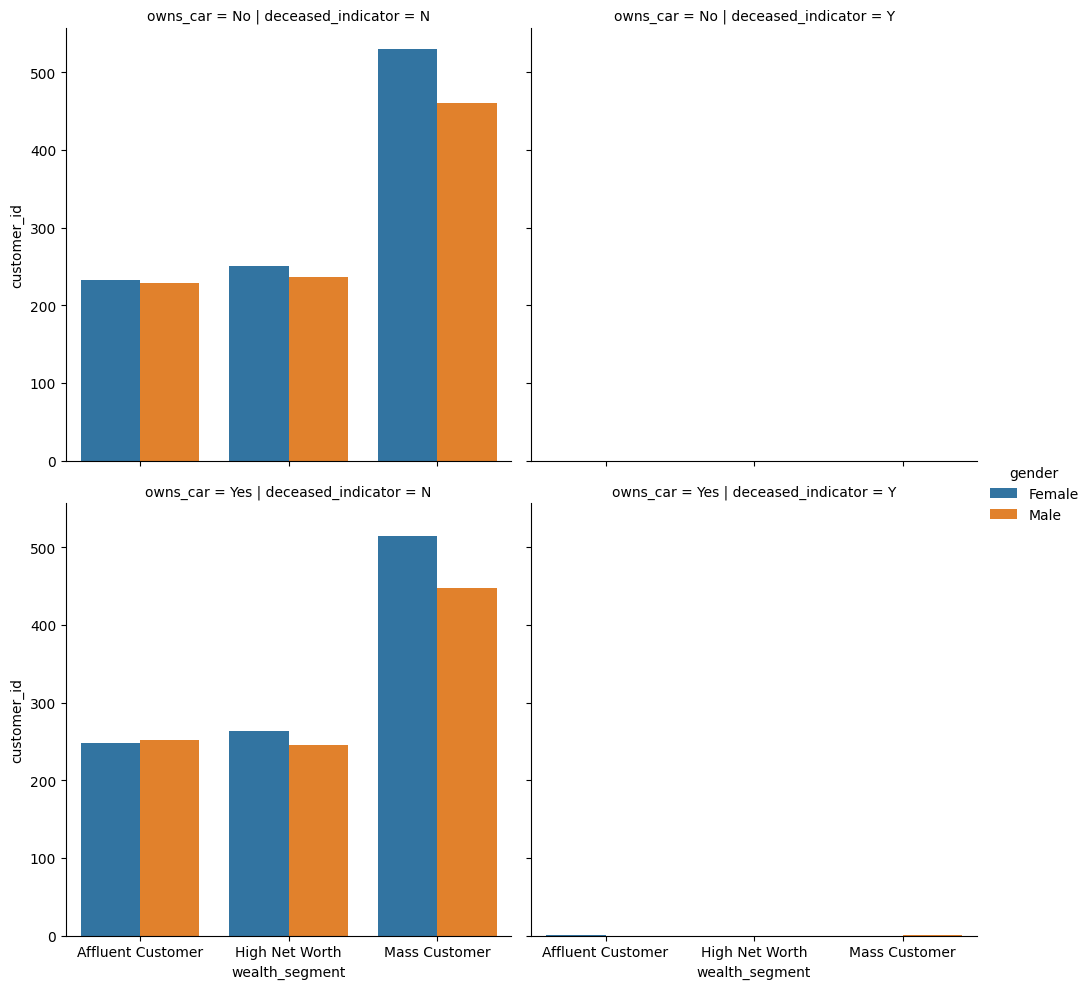

In [39]:
sns.catplot(data=collection, y ="customer_id", x = "wealth_segment", col = "deceased_indicator", row = "owns_car", hue = "gender", kind="bar")

Popular customers are both who don't car and those whon has cars

Both genders are popular customers (to be specific they are females)

Deceased_indicator is 'N'


In [40]:
custdem.sort_values('DOB').head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
703,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1064,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0
3333,3410,Merrili,Brittin,Female,93,1940-09-22,missing,Property,Mass Customer,N,No,16.0
2360,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
643,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0


In [41]:
custdem = custdem.drop(index=33, axis=0)

In [42]:
custdem['DOB'].max()

'2002-03-11'

In [43]:
custdem['DOB'].min()

'1931-10-23'

In [44]:
born = custdem['DOB']
def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

custdem['age'] = custdem['DOB'].apply(calculate_age)
print(custdem['age'])

0       69
1       42
2       69
3       61
4       45
        ..
3907    47
3908    47
3909    21
3910    49
3911    31
Name: age, Length: 3911, dtype: int64


In [45]:
custdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,missing,Male,33,1961-10-03,missing,IT,Mass Customer,N,No,7.0,61
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,missing,Affluent Customer,N,Yes,8.0,45


In [46]:
custdem['age'].max()

91

In [47]:
custdem['age'].min()

20

In [65]:
custdem["Age_group"] = pd.cut(x=custdem["age"], bins=[0,50,91],
                             labels=['Young', 'Old'])

In [49]:
custdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,Age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69,Old
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42,Middle_aged
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69,Old
3,4,Talbot,missing,Male,33,1961-10-03,missing,IT,Mass Customer,N,No,7.0,61,Old
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,missing,Affluent Customer,N,Yes,8.0,45,Middle_aged


In [66]:
age = custdem.groupby("Age_group")['customer_id'].count().reset_index()
age

,Age_group,customer_id
0,Young,2644
1,Old,1267


In [71]:
px.bar(age, x="Age_group", y="customer_id", color="Age_group")

In [99]:
young = 2644
old = 1267
total = young + old
old_percent = round((old/total)*100)
old_percent

32

In [101]:
custdem.to_csv("CustomerDemographic_eng.csv", index=False)

In [51]:
custadd = pd.read_csv("CustomerAddress.csv")

In [52]:
custadd.head()

,Unnamed: 0,customer_id,address,postcode,state,country,property_valuation
0,0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,4,6,9 Oakridge Court,3216,VIC,Australia,9


In [53]:
custadd.shape

(3999, 7)

In [54]:
custadd["customer_id"].nunique()

3999

In [55]:
custadd["country"].unique()

array(['Australia'], dtype=object)

In [56]:
custadd["state"].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [57]:
custadd["property_valuation"].unique()

array([10,  9,  4, 12,  8,  6,  7,  3,  5, 11,  1,  2], dtype=int64)

In [58]:
custadd["property_valuation"].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [59]:
custadd["postcode"].nunique()

873

In [60]:
custadd["address"].nunique()

3996

In [61]:
newcust = pd.read_csv("NewCustomerList.csv")

In [62]:
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [63]:
newcust.shape

(983, 18)